<a href="https://colab.research.google.com/github/springboardmentor425/MediAlert-AI-Anomaly-Detection-for-Smarter-Healthcare-Insights/blob/pravallika/modeling_isolation_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [2]:
scaler=MinMaxScaler()
model=IsolationForest()
imputer=SimpleImputer(strategy='mean')

In [3]:
data=pd.read_csv('/content/Healthcare Providers.csv')

In [5]:
selected_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount'
]

In [6]:
for col in selected_columns:
    data[col]=pd.to_numeric(data[col],errors='coerce')

In [7]:
df=imputer.fit_transform(data[selected_columns])

In [8]:
df=scaler.fit_transform(df)
df=pd.DataFrame(df,columns=selected_columns)

In [9]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [10]:
model.fit(df)

IsolationForest()

In [11]:
df['anomaly']=model.predict(df)

In [12]:
counts=df['anomaly'].value_counts()

In [13]:
total = counts.sum()
anomaly_pct = (counts.get(-1, 0) / total) * 100

print(f"Total Points: {total}")
print(f"Anomalies: {counts.get(-1, 0)}")
print(f"Anomaly Percentage: {anomaly_pct:.2f}%")

Total Points: 100000
Anomalies: 14215
Anomaly Percentage: 14.21%


In [14]:
total = counts.sum()
anomaly_pct = (counts.get(-1, 0) / total) * 100

print(f"Total Points: {total}")
print(f"Anomalies: {counts.get(-1, 0)}")
print(f"Anomaly Percentage: {anomaly_pct:.2f}%")

Total Points: 100000
Anomalies: 14215
Anomaly Percentage: 14.21%


(array([54244., 13404.,  8069.,  3752.,  2603.,  1662.,   931.,   623.,
          348.,   149.]),
 array([0.        , 0.04504049, 0.09008097, 0.13512146, 0.18016194,
        0.22520243, 0.27024291, 0.3152834 , 0.36032389, 0.40536437,
        0.45040486]),
 <BarContainer object of 10 artists>)

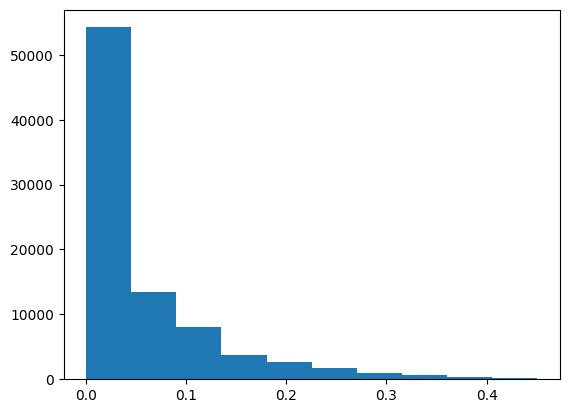

In [16]:
# Assuming 'df' contains the data with an 'anomaly' column
# where 1 represents normal and -1 represents anomalies

# Create a DataFrame containing normal data points
normal_df = df[df['anomaly'] == 1]

# Create a DataFrame containing anomalous data points (for later use)
anomaly_df = df[df['anomaly'] == -1]

# Now you can proceed with the plotting:
plt.hist(normal_df['Number of Services'])

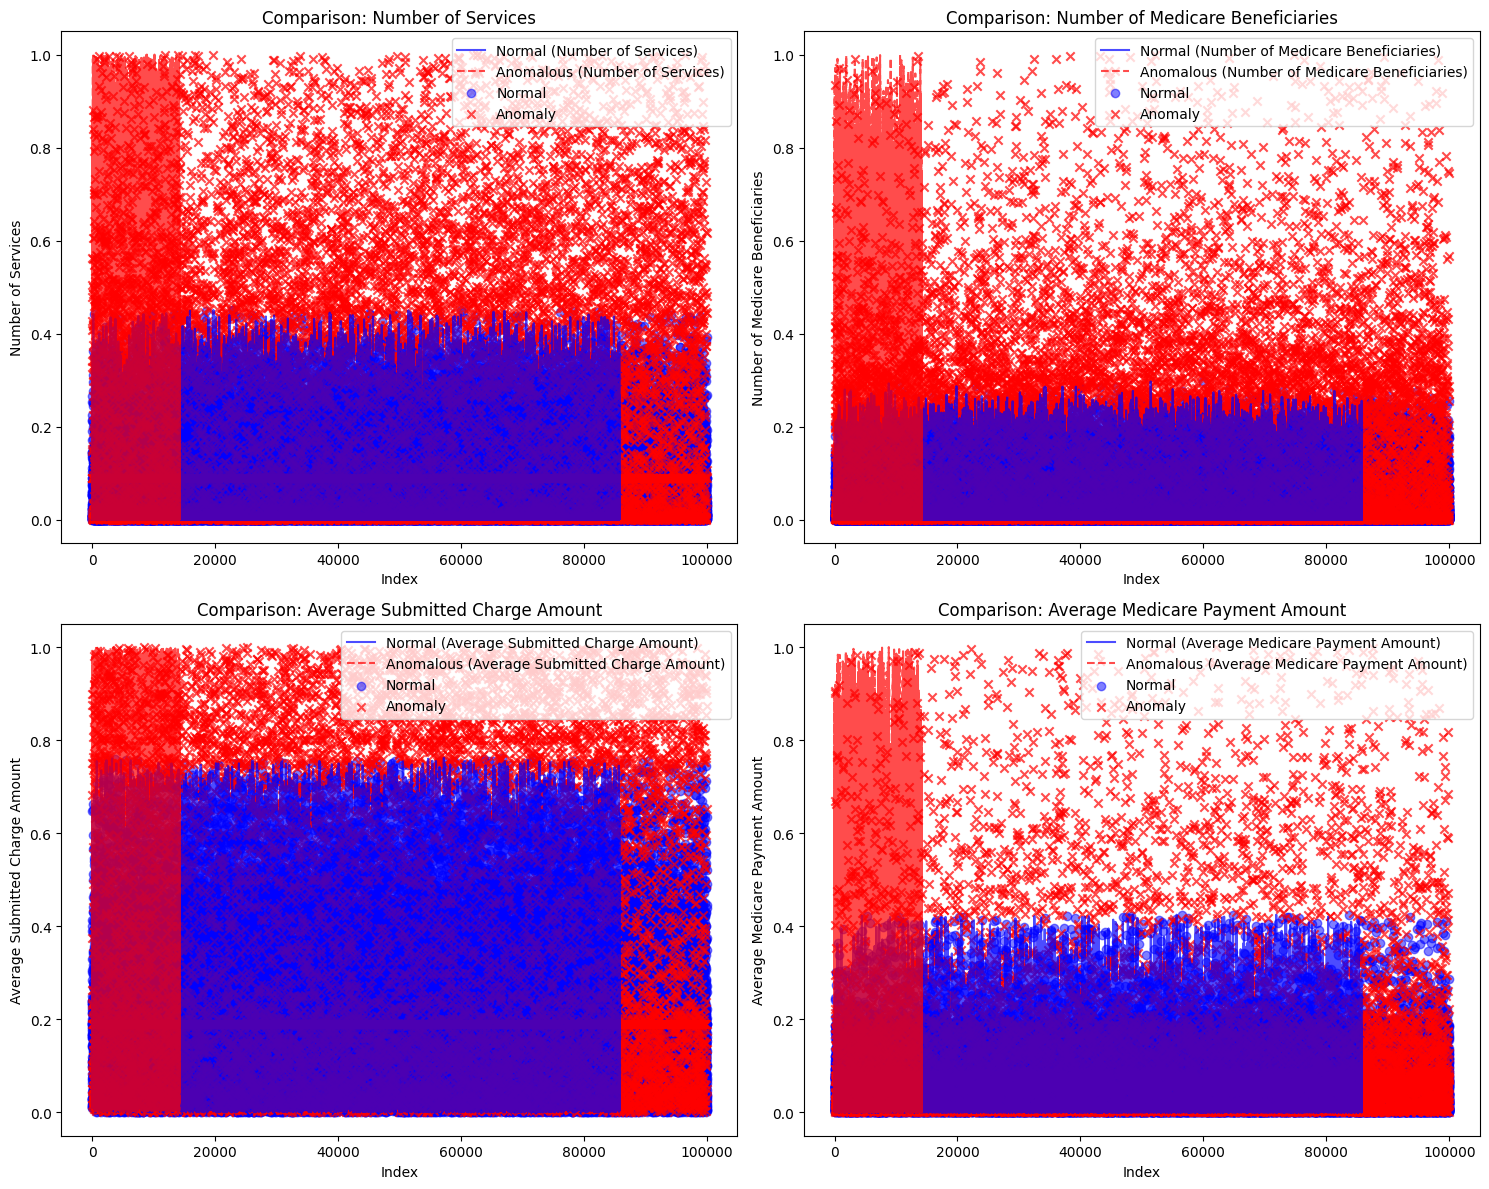

In [24]:
import matplotlib.pyplot as plt

# Define the columns to be plotted
columns_to_plot = ['Number of Services', 'Number of Medicare Beneficiaries',
                   'Average Submitted Charge Amount', 'Average Medicare Payment Amount']

# Set the figure size for better visualization
plt.figure(figsize=(15, 12))

# Loop through each column and plot different types of graphs
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)  # Arrange subplots in a 2x2 grid

    # Line Plot
    plt.plot(normal_df[col].reset_index(drop=True), label=f'Normal ({col})', alpha=0.7, color='blue', linestyle='-')
    plt.plot(anomaly_df[col].reset_index(drop=True), label=f'Anomalous ({col})', alpha=0.7, color='red', linestyle='--')

    # Scatter Plot (optional, to highlight anomalies)
    plt.scatter(normal_df.index, normal_df[col], color='blue', label='Normal', alpha=0.5, marker='o')
    plt.scatter(anomaly_df.index, anomaly_df[col], color='red', label='Anomaly', alpha=0.7, marker='x')

    # Adding Title, Labels and Legends
    plt.title(f'Comparison: {col}', fontsize=12)
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.legend(loc='upper right')
    plt.tight_layout()

# Show the combined plots
plt.show()


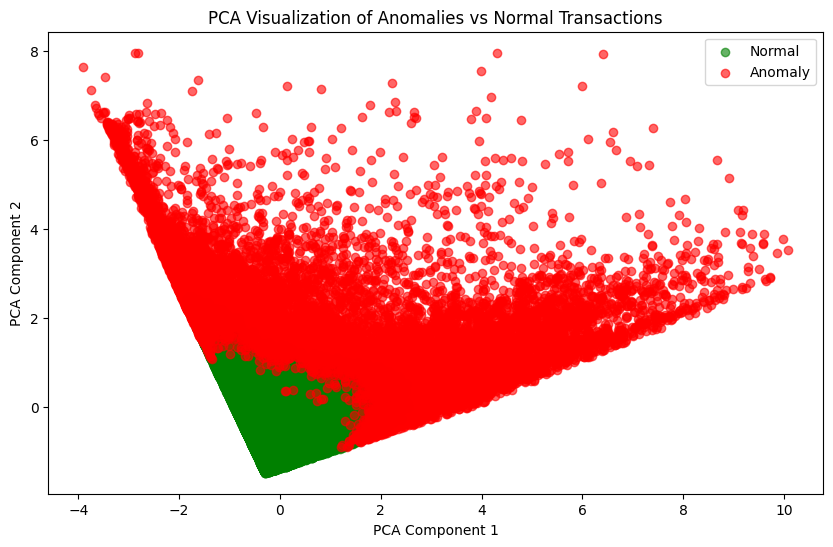

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'selected_columns' are the features you used for anomaly detection
billing_data = df  # Rename 'df' to 'billing_data' for clarity
billing_data['Anomaly'] = billing_data['anomaly'].map({1: 'Normal', -1: 'Anomaly'})  # Create 'Anomaly' column

# Scale the data - you likely did this earlier, but we need it here
from sklearn.preprocessing import StandardScaler # Import StandardScaler if not already imported
scaler = StandardScaler()  # Initialize the scaler
billing_data_scaled = scaler.fit_transform(billing_data[selected_columns])  # Scale the data


# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(billing_data_scaled)

# Plot normal vs anomalies
plt.figure(figsize=(10, 6))
for anomaly_status, color, label in [('Normal', 'green', 'Normal'), ('Anomaly', 'red', 'Anomaly')]:
    subset = billing_data[billing_data['Anomaly'] == anomaly_status]
    plt.scatter(pca_data[subset.index, 0], pca_data[subset.index, 1], c=color, label=label, alpha=0.6)

plt.title('PCA Visualization of Anomalies vs Normal Transactions')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [19]:
import sklearn.datasets
import pandas as pd
import numpy as np

In [21]:
!pip install umap-learn
import umap.umap_ as umap # Import the umap module from umap-learn
# Previous lines stay the same

# UMAP for Dimensionality Reduction
umap_reducer = umap.UMAP(n_neighbors=30, min_dist=0.05, n_components=2, random_state=42)

# The rest of your code remains the same

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.9 MB/s eta 0:00:00


In [26]:
df['anomaly_score'] = model.decision_function(df[selected_columns])  # Negative scores = anomalies

In [ ]:
import plotly.express as px


# UMAP for 2D dimensionality reduction
umap_reducer = umap.UMAP(n_neighbors=30, min_dist=0.05, n_components=2, random_state=42)
umap_embeddings = umap_reducer.fit_transform(df[selected_columns])

# Add UMAP dimensions to DataFrame
df['UMAP1'] = umap_embeddings[:, 0]
df['UMAP2'] = umap_embeddings[:, 1]

# Interactive plot with anomaly scores as color
fig = px.scatter(
    df,
    x='UMAP1',
    y='UMAP2',
    color='anomaly_score',
    title='Advanced UMAP Visualization of Anomalies',
    color_continuous_scale='RdYlGn',  # Red = anomalies, Green = normal
    hover_data={'UMAP1': True, 'UMAP2': True, 'anomaly': True, 'anomaly_score': True},
)

fig.update_traces(marker=dict(size=5, opacity=0.7))
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
